# Count


In [1]:
FILE_NAME = "tfidf"
GRAPH_TITLE = "TF-IDF"


In [2]:
import polars as pl
from utils.load_data import get_data


In [3]:
X_train, X_test, y_train, y_test = get_data("2xs")
print([X_train.shape, X_test.shape, y_train.shape, y_test.shape])


[(16000,), (4000,), (16000,), (4000,)]


## Fit Model


In [4]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


In [5]:
def make_pipeline(classifier):
    return Pipeline(
        [
            ("vect", TfidfVectorizer(use_idf=True)),
            ("clf", classifier),
        ]
    )


pipelines = {
    'nb_pipeline': make_pipeline(BernoulliNB()),
    'lr_pipeline': make_pipeline(LogisticRegression(max_iter=1000, C=10, n_jobs=-2)),
    'dt_pipeline': make_pipeline(DecisionTreeClassifier()),
    'rf_pipeline': make_pipeline(RandomForestClassifier(n_jobs=-2, n_estimators=100)),
    'svm_pipeline': make_pipeline(svm.SVC(C=10, probability=True)),
}


In [6]:
def fit(key, pipeline):
    print(key)
    pipeline.fit(X_train, y_train)
    return pipeline

pipelines_fit = {k: fit(k, v) for k, v in pipelines.items()}

nb_pipeline
lr_pipeline
dt_pipeline
rf_pipeline
svm_pipeline


In [7]:
{k: v.classes_ for k, v in pipelines_fit.items()}

{'nb_pipeline': array(['false', 'true'], dtype='<U5'),
 'lr_pipeline': array(['false', 'true'], dtype=object),
 'dt_pipeline': array(['false', 'true'], dtype=object),
 'rf_pipeline': array(['false', 'true'], dtype=object),
 'svm_pipeline': array(['false', 'true'], dtype=object)}

## Evaluation


In [8]:
from utils.plot import plot_eval
import sklearn.metrics as metrics


In [9]:
def calc_eval(classifier, X, y):
    print(classifier)
    pred = classifier.predict(X)
    return {
        "auc": metrics.roc_auc_score(y, classifier.predict_proba(X)[:, 1]),
        "accuracy": metrics.accuracy_score(y, pred),
        "precision": metrics.precision_score(y, pred, pos_label="true"),  # type: ignore
        "recall": metrics.recall_score(y, pred, pos_label="true"),  # type: ignore
        "f1": metrics.f1_score(y, pred, pos_label="true"),  # type: ignore
    }


In [10]:
import json

result = {k: calc_eval(v, X_test, y_test) for k, v in pipelines_fit.items()}
print(json.dumps(result, indent=4))

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', BernoulliNB())])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=10, max_iter=1000, n_jobs=-2))])
Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-2))])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SVC(C=10, probability=True))])
{
    "nb_pipeline": {
        "auc": 0.917222194984311,
        "accuracy": 0.83925,
        "precision": 0.8656949505465903,
        "recall": 0.81201171875,
        "f1": 0.8379944570420761
    },
    "lr_pipeline": {
        "auc": 0.9349321459160476,
        "accuracy": 0.86525,
        "precision": 0.8763092269326683,
        "recall": 0.85791015625,
        "f1": 0.8670120898100174
    },
    "dt_pipeline": {
        "auc": 0.806762445168417,
        "accuracy": 0.79875,
        "precision": 0.82590456213948

nb_pipeline
              precision    recall  f1-score   support

       false       0.81      0.87      0.84      1952
        true       0.87      0.81      0.84      2048

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


lr_pipeline
              precision    recall  f1-score   support

       false       0.85      0.87      0.86      1952
        true       0.88      0.86      0.87      2048

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


dt_pipeline
              precision    recall  f1-score   support

       false       0.77      0.83      0.80      1952
        true       0.83      0.77      0.80      2048

    accuracy                           0.80      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.80      0.80      0.80      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


rf_pipeline
              precision    recall  f1-score   support

       false       0.83      0.88      0.85      1952
        true       0.88      0.83      0.85      2048

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


svm_pipeline
              precision    recall  f1-score   support

       false       0.88      0.89      0.88      1952
        true       0.89      0.88      0.89      2048

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


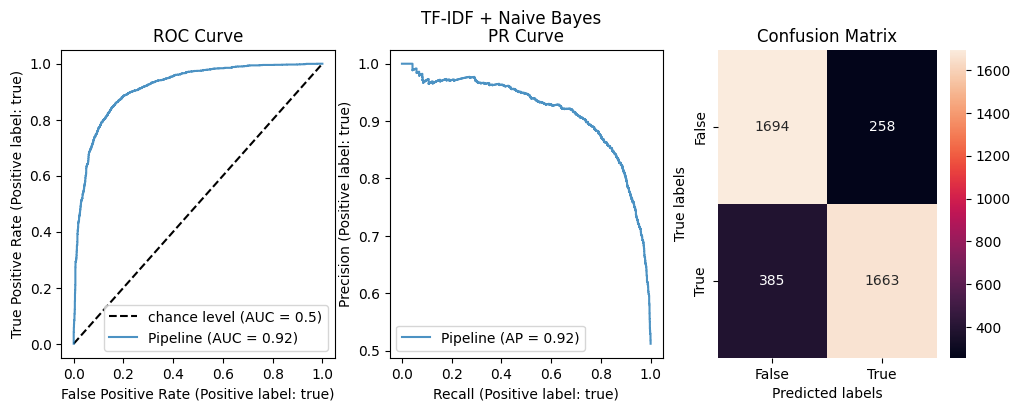

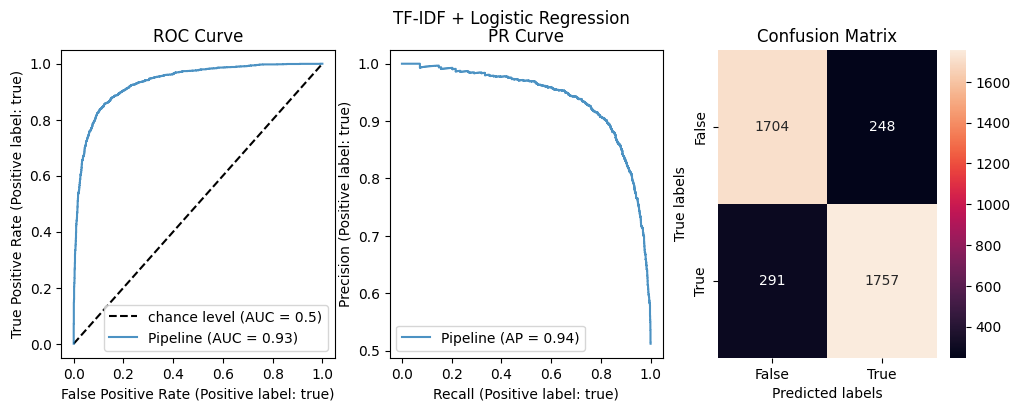

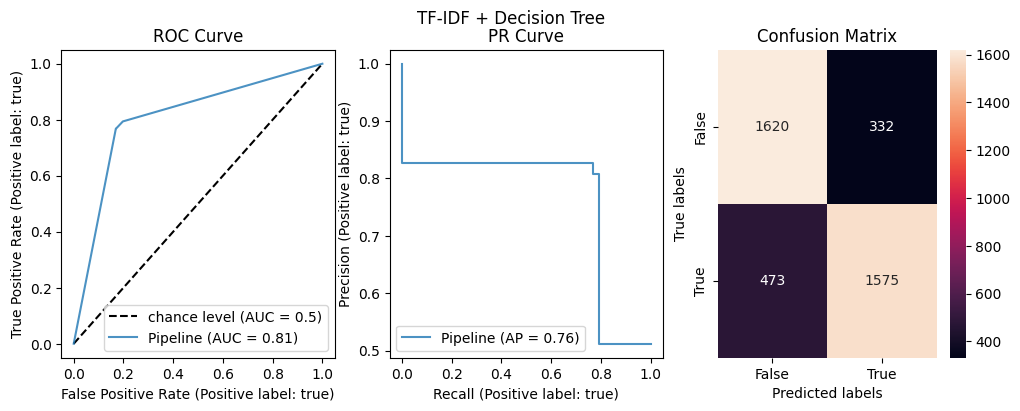

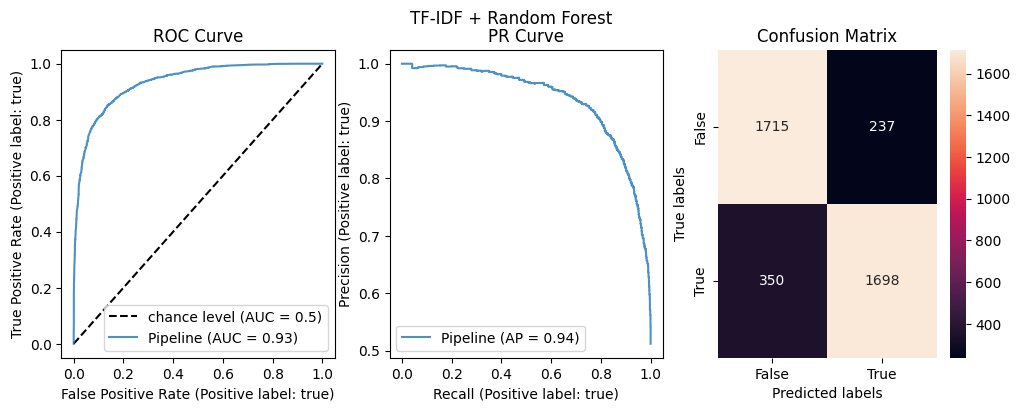

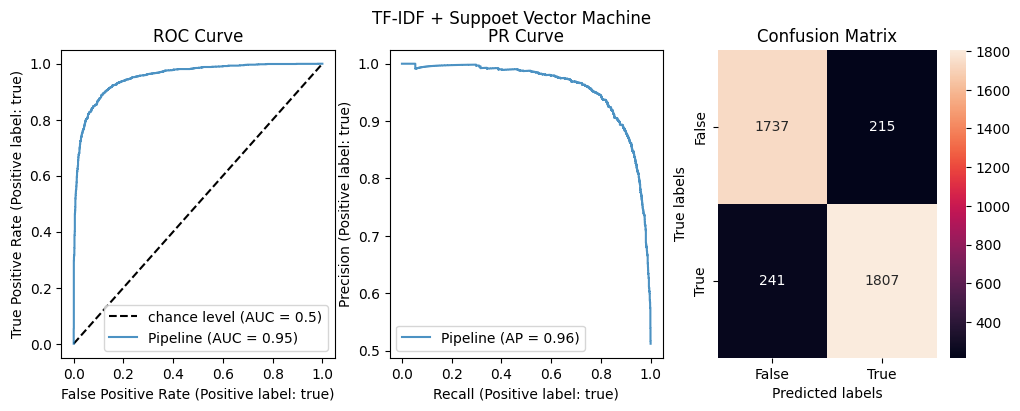

In [11]:
names = {
    'nb_pipeline': "Naive Bayes",
    'lr_pipeline': "Logistic Regression",
    'dt_pipeline': "Decision Tree",
    'rf_pipeline': "Random Forest",
    'svm_pipeline': "Suppoet Vector Machine",
}

for k, classifier in pipelines_fit.items():
    y_pred = classifier.predict(X_test)
    clf_report = metrics.classification_report(y_test, y_pred)
    print(k)
    print(clf_report)
    
    plt = plot_eval(X_test, y_test, y_pred, classifier, f'{GRAPH_TITLE} + {names[k]}')
    plt.savefig(f"output/{FILE_NAME}_{names[k]}.png")



## LIAR Test


In [12]:
from utils.load_data import load_liar

X_liar, y_liar = load_liar()


In [13]:
import json

result = {k: calc_eval(v, X_liar, y_liar) for k, v in pipelines_fit.items()}
print(json.dumps(result, indent=4))

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', BernoulliNB())])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=10, max_iter=1000, n_jobs=-2))])
Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-2))])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SVC(C=10, probability=True))])
{
    "nb_pipeline": {
        "auc": 0.5146794963615265,
        "accuracy": 0.4763505589867876,
        "precision": 0.36110054520096363,
        "recall": 0.6319059241180386,
        "f1": 0.45957721478134583
    },
    "lr_pipeline": {
        "auc": 0.51573744345536,
        "accuracy": 0.4431240716128528,
        "precision": 0.3564845292955892,
        "recall": 0.7208786332371866,
        "f1": 0.4770574847661699
    },
    "dt_pipeline": {
        "auc": 0.513577824698251,
        "accuracy": 0.48612305527

nb_pipeline
              precision    recall  f1-score   support

       false       0.66      0.39      0.49      8284
        true       0.36      0.63      0.46      4507

    accuracy                           0.48     12791
   macro avg       0.51      0.51      0.48     12791
weighted avg       0.56      0.48      0.48     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


lr_pipeline
              precision    recall  f1-score   support

       false       0.66      0.29      0.40      8284
        true       0.36      0.72      0.48      4507

    accuracy                           0.44     12791
   macro avg       0.51      0.51      0.44     12791
weighted avg       0.55      0.44      0.43     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


dt_pipeline
              precision    recall  f1-score   support

       false       0.66      0.42      0.52      8284
        true       0.36      0.60      0.45      4507

    accuracy                           0.49     12791
   macro avg       0.51      0.51      0.48     12791
weighted avg       0.56      0.49      0.49     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


rf_pipeline
              precision    recall  f1-score   support

       false       0.66      0.40      0.50      8284
        true       0.36      0.62      0.46      4507

    accuracy                           0.48     12791
   macro avg       0.51      0.51      0.48     12791
weighted avg       0.56      0.48      0.48     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


svm_pipeline
              precision    recall  f1-score   support

       false       0.66      0.25      0.36      8284
        true       0.36      0.77      0.49      4507

    accuracy                           0.43     12791
   macro avg       0.51      0.51      0.42     12791
weighted avg       0.56      0.43      0.41     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


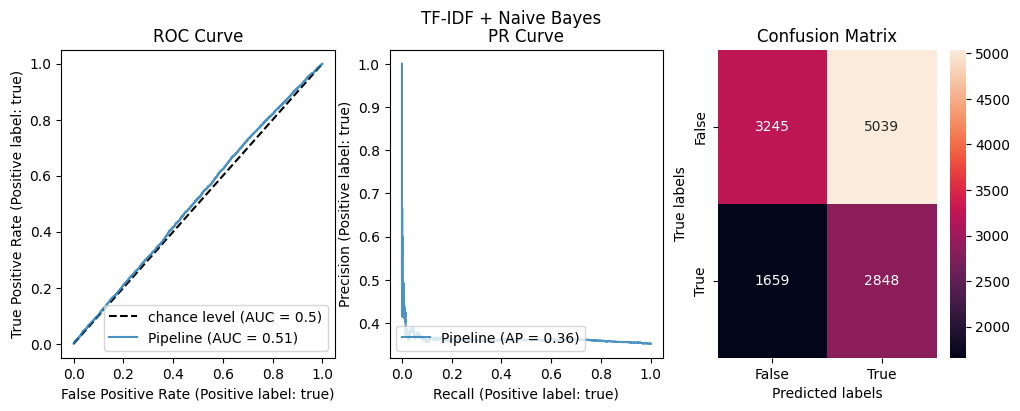

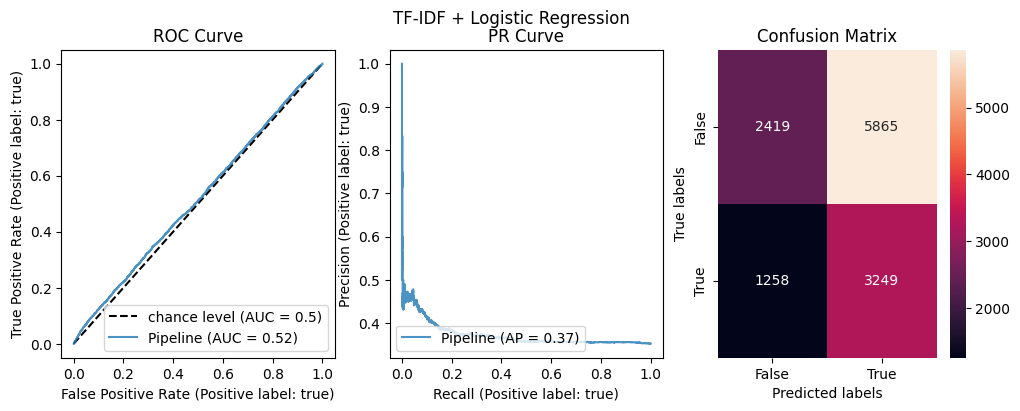

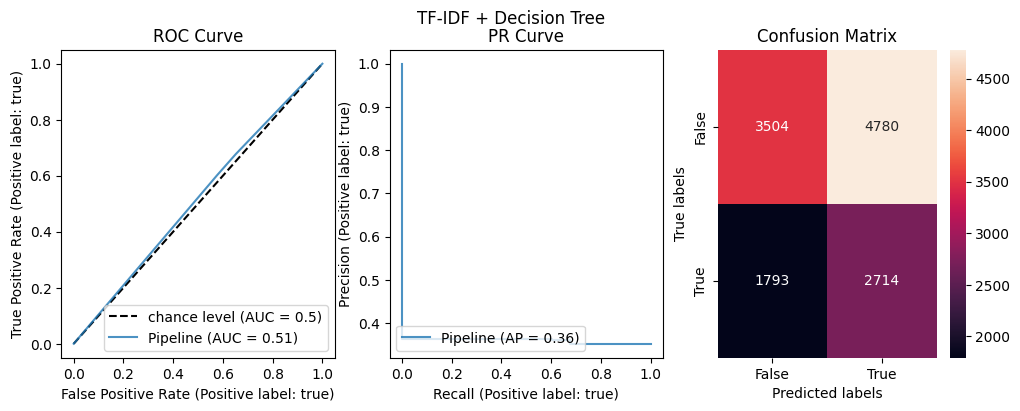

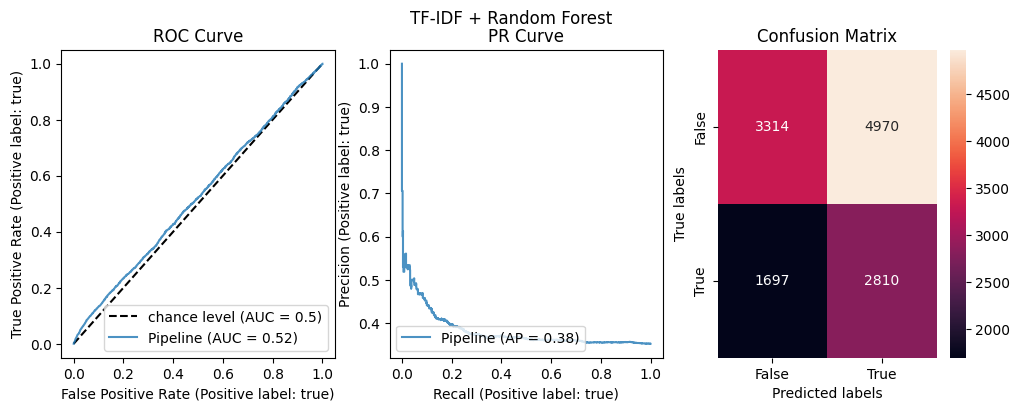

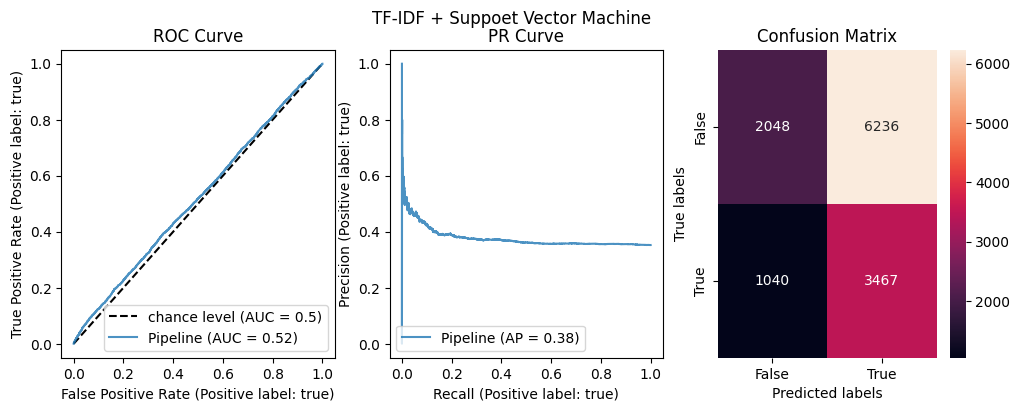

In [14]:
for k, classifier in pipelines_fit.items():
    y_pred = classifier.predict(X_liar)
    clf_report = metrics.classification_report(y_liar, y_pred)
    print(k)
    print(clf_report)

    plt = plot_eval(X_liar, y_liar, y_pred, classifier, f"{GRAPH_TITLE} + {names[k]}")
    plt.savefig(f"output/{FILE_NAME}_liar_{names[k]}.png")


In [15]:
import json

with open(f"./output/{FILE_NAME}_result_eval.txt", "w") as writer:
    writer.write("Result\n")
    result = {k: calc_eval(v, X_test, y_test) for k, v in pipelines_fit.items()}
    writer.write(
        json.dumps(
            result,
            indent=4,
        )
    )
    writer.write("LIAR Result\n")
    result = {k: calc_eval(v, X_liar, y_liar) for k, v in pipelines_fit.items()}
    writer.write(
        json.dumps(
            result,
            indent=4,
        )
    )


Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', BernoulliNB())])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=10, max_iter=1000, n_jobs=-2))])
Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-2))])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SVC(C=10, probability=True))])
Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', BernoulliNB())])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=10, max_iter=1000, n_jobs=-2))])
Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-2))])
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SVC(C=10, probability=True))])


## Export model


In [16]:
from joblib import dump, load

for k, v in pipelines_fit.items():
    dump(classifier, f"output/{FILE_NAME}_{k}.joblib")


In [17]:
# Convert into ONNX format
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType

initial_type = [
    (
        "text",
        StringTensorType(
            [
                None,
            ]
        ),
    )
]

In [18]:
for k, v in pipelines_fit.items():
    onx = convert_sklearn(classifier, initial_types=initial_type)
    with open(f"output/{FILE_NAME}_{k}.onnx", "wb") as f:
        f.write(onx.SerializeToString())

In [ ]:
# # Compute the prediction with ONNX Runtime
# import onnxruntime as rt
# import numpy

# sess = rt.InferenceSession(
#     f"output/{FILE_NAME}.onnx", providers=["CPUExecutionProvider"]
# )
# input_name = sess.get_inputs()[0].name
# label_name = sess.get_outputs()[0].name


In [ ]:
# pred_onx = sess.run(None, {input_name: X_test})
# pred_onx
